In [2]:
pip install keras-utils


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.utils import to_categorical

import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
import cv2



In [25]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


In [26]:
def get_data(dir_path="/Users/User/Downloads/train/", face_cas="/Users/User/Downloads/Drowsiness detection/haar cascade files/haarcascade_frontalface_alt.xml", 
             eye_cas="/Users/User/Downloads/archive-2/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [27]:
data_train = get_data()

2
OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

3
OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [28]:
BS= 32
TS=(24,24)
train_batch= generator('/Users/User/Downloads/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('/Users/User/Downloads/Valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 1477 images belonging to 2 classes.
Found 2523 images belonging to 2 classes.
46 78


In [44]:
# img,labels= next(train_batch)
# print(img.shape)
def Optimal_model():
  model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

model.save('models/cnnCat2.h5', overwrite=True)

Epoch 1/15


/var/folders/zj/t__vxdy96jgcwr6z7n697f500000gn/T/ipykernel_2260/814966032.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)


46/46 [==============================] - 2s 39ms/step - loss: 0.3536 - accuracy: 0.8325 - val_loss: 0.4902 - val_accuracy: 0.7496
Epoch 2/15
46/46 [==============================] - 2s 46ms/step - loss: 0.0947 - accuracy: 0.9689 - val_loss: 0.2923 - val_accuracy: 0.8910
Epoch 3/15
46/46 [==============================] - 3s 57ms/step - loss: 0.0641 - accuracy: 0.9792 - val_loss: 0.4703 - val_accuracy: 0.7508
Epoch 4/15
46/46 [==============================] - 4s 77ms/step - loss: 0.0342 - accuracy: 0.9910 - val_loss: 0.2588 - val_accuracy: 0.9211
Epoch 5/15
46/46 [==============================] - 3s 61ms/step - loss: 0.0190 - accuracy: 0.9952 - val_loss: 0.2832 - val_accuracy: 0.9279
Epoch 6/15
46/46 [==============================] - 2s 52ms/step - loss: 0.0225 - accuracy: 0.9945 - val_loss: 0.2472 - val_accuracy: 0.9339
Epoch 7/15
46/46 [==============================] - 2s 51ms/step - loss: 0.0082 - accuracy: 0.9958 - val_loss: 0.3152 - val_accuracy: 0.9355
Epoch 8/15
46/46 [======

In [45]:


def create_model_1():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(1, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_model_2():
    model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_model_3():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a list of model architectures to compare
model_architectures = [create_model_1(), create_model_2(), create_model_3(), Optimal_model()]

model_results = []

for model in model_architectures:
    history = model.fit_generator(train_batch, validation_data=valid_batch, epochs=15, steps_per_epoch=SPE, validation_steps=VS)
    model_results.append(history)




Epoch 1/15
 1/46 [..............................] - ETA: 7s - loss: 0.6962 - accuracy: 0.4375

/var/folders/zj/t__vxdy96jgcwr6z7n697f500000gn/T/ipykernel_2260/56241135.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batch, validation_data=valid_batch, epochs=15, steps_per_epoch=SPE, validation_steps=VS)


46/46 [==============================] - 1s 23ms/step - loss: 0.3971 - accuracy: 0.8083 - val_loss: 0.3555 - val_accuracy: 0.7812
Epoch 2/15
46/46 [==============================] - 1s 25ms/step - loss: 0.1205 - accuracy: 0.9578 - val_loss: 0.2710 - val_accuracy: 0.9099
Epoch 3/15
46/46 [==============================] - 1s 31ms/step - loss: 0.0587 - accuracy: 0.9820 - val_loss: 0.3248 - val_accuracy: 0.8153
Epoch 4/15
46/46 [==============================] - 1s 28ms/step - loss: 0.0367 - accuracy: 0.9924 - val_loss: 0.2581 - val_accuracy: 0.8718
Epoch 5/15
46/46 [==============================] - 1s 28ms/step - loss: 0.0230 - accuracy: 0.9945 - val_loss: 0.2508 - val_accuracy: 0.8726
Epoch 6/15
46/46 [==============================] - 2s 38ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.3113 - val_accuracy: 0.8233
Epoch 7/15
46/46 [==============================] - 2s 40ms/step - loss: 0.0120 - accuracy: 0.9972 - val_loss: 0.2561 - val_accuracy: 0.8958
Epoch 8/15
46/46 [======

Epoch 14/15
46/46 [==============================] - 1s 29ms/step - loss: 1.3214e-04 - accuracy: 1.0000 - val_loss: 0.4331 - val_accuracy: 0.9275
Epoch 15/15
46/46 [==============================] - 30s 669ms/step - loss: 0.0043 - accuracy: 0.9979 - val_loss: 0.4561 - val_accuracy: 0.8894


Model 1:
Training Accuracy: 1.0
Validation Accuracy: 0.8810096383094788


Model 2:
Training Accuracy: 1.0
Validation Accuracy: 0.9563301205635071


Model 3:
Training Accuracy: 1.0
Validation Accuracy: 0.9399038553237915


Model 4:
Training Accuracy: 0.9979238510131836
Validation Accuracy: 0.8894230723381042




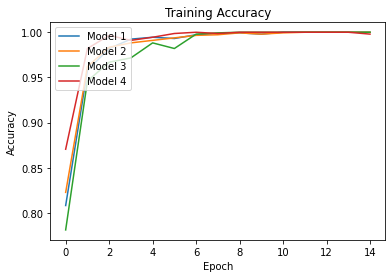

In [46]:
# Compare the model performance
for i, history in enumerate(model_results):
    print(f"Model {i + 1}:")
    print(f"Training Accuracy: {history.history['accuracy'][-1]}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
    print("\n")

# Plot the training and validation accuracy
for i, history in enumerate(model_results):
    plt.plot(history.history['accuracy'], label=f"Model {i + 1}")

plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()